# 긍정적인 글 분류하기

In [4]:
import pandas as pd

## 긍정사전과 부정사전 가져오기

In [13]:
# 긍정사전과 부정사전 가져오기
pos_df = pd.read_csv("./data/pos_df_test.csv")
neg_df = pd.read_csv("./data/neg_df_test.csv")
# 긍정, 부정 사전  리스트로 변환 
pos_word = pos_df['word'].values.tolist()
neg_word = neg_df['word'].values.tolist()

## "sentiment1"열 추가하기
sentiment1 = 식당-미디어 모든 글의 긍정적인 단어 수 - 부정적인 수

In [17]:
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    pos = 0
    neg = 0
    for i in range(len(data)):
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
        for words in neg_word:
            if words in data.iloc[i]["description"]:
                neg += 1
    # 해당 파일의 감정분석 결과 저장
    naver_total.loc[row, "sentiment1"] = pos - neg
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

## "sentiment2"열 추가하기
sentiment2 = 식당-미디어 모든 글의 리뷰별 positive 갯수 

In [18]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
naver_total["sentiment2"] = None
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        if pos > 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment2 = len(data.loc[data["senti"] == "positive"]) 
    naver_total.loc[row, "sentiment2"] = sentiment2
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

## "sentiment3"열 추가하기
sentiment3 = 식당-미디어 모든 글의 리뷰별 positive - negative 갯수

In [21]:
# 감정사전이 완료 되지 않았을 때
# 종합 데이터 가져오기
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")
naver_total["sentiment3"] = None
for row in range(len(naver_total)):
    file = "./data/naver_blog/rowdata_resource/" + naver_total.iloc[row]["restaurant"] + "_" + naver_total.iloc[row]["resource"] + ".csv"
    data = pd.read_csv(file)
    # 해당 파일의 하나의 행에 대한 감정분석
    data["senti"] = None
    for i in range(len(data)):
        pos = 0
        neg = 0 
        for words in pos_word:
            if words in data.iloc[i]["description"]:
                pos += 1
                
        for words in neg_word:
            if words in data.iloc[i]["description"]:
                neg += 1

        # 각 글의 긍정적인 단어가 1개만 있어도 긍정적인 글입니다.
        senti = pos - neg 
        
        if senti >= 0:
            data.loc[i,"senti"] = "positive"
        else:
            data.loc[i,"senti"] = "negative"
    # 해당 파일의 감정분석 결과 저장
    # positive가 반이상면 positive
    sentiment3 = len(data.loc[data["senti"] == "positive"]) - len(data.loc[data["senti"] == "negative"])
    naver_total.loc[row, "sentiment3"] = sentiment3
# 파일로 저장
naver_total.to_csv("./data/naver_blog/total_power.csv", index=False)

* sentiment1 : 해당 식당 전체 리뷰 긍정단어 - 부정단어
* sentiment2 : 해당 식당 리뷰별 positive 갯수    
* sentiment2 : 해당 식당 리뷰별 positive - negative 갯수 

In [66]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)      #생략된 내용없이 전체 다 보여주게 하는 세팅 

In [42]:
#display(naver_total.loc[naver_total.sentiment2 == 0])

## 데이터프레임으로 변환
#### resorce 별로 데이터프레임

In [148]:
naver_total = pd.read_csv("./data/naver_blog/total_power.csv")

In [95]:
df_res_pos = pd.DataFrame(naver_total.groupby(['resource'])['sentiment2'].mean())    # resource 별로 평균 positive 평균갯수로 그룹화 
df_res_pos = df_res_pos.reset_index()     # 새로운 인덱스 생성 
df_res_pos.columns = ['resource', 'positive_avg'] #  새 column 명 생성 

In [118]:
#display(df_res_pos)

#### group별로 데이터프레임

In [149]:
total_group = naver_total

In [150]:
# 리뷰가 없는곳이 포함되면 결과값이 부정확해지므로 해당 resource 삭제 

d = total_group[(total_group['sentiment1'] == 0) & (total_group['sentiment2'] == 0) & (total_group['sentiment3'] == 0)].index

total_group.drop(d, inplace = True)         

In [151]:
df_group_pos = pd.DataFrame(total_group.groupby(['group'])['sentiment2'].mean())
df_group_pos = df_group_pos.reset_index()
df_group_pos.columns = ['group', 'positive_avg']


In [152]:
display(df_group_pos)

,group,positive_avg
0,방송프로그램,17.462963
1,연예인,16.961165
2,유튜버,1.000000


# 시각화

In [15]:
matplotlib.get_cachedir()

'C:\\Users\\jh367\\.matplotlib'

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트설정
from matplotlib import font_manager, rc
font_path = "./data/font/21582067_G마켓산스Medium_OTF.otf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print("폰트설정 :", font_name)
rc('font', family=font_name)

# 색깔 설정
my_colors = sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10)
my_colors2 = sns.color_palette("RdPu", 1) + sns.color_palette("Purples", 1) + sns.color_palette("Blues", 1)


폰트설정 : Gmarket Sans


In [18]:
import matplotlib 
matplotlib.font_manager._rebuild()

In [154]:
groups = ['연예인', '유튜버', '방송프로그램']

temp = pd.DataFrame()
for i, media in enumerate(groups):
    temp = temp.append(df_group_pos.loc[df_group_pos.group == media])
df_group_pos = temp.copy()
display(df_group_pos)

,group,positive_avg
1,연예인,16.961165
2,유튜버,1.000000
0,방송프로그램,17.462963


C:\Users\jh367\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


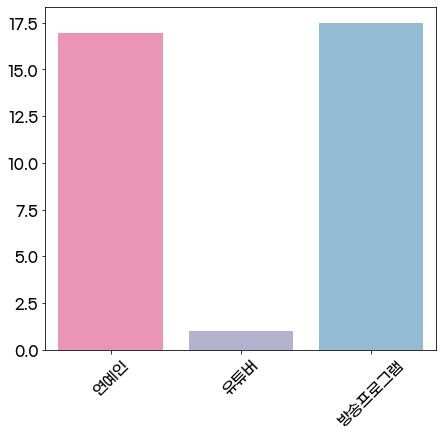

In [160]:
plt.figure(figsize=(7, 7))
plt.rc('font', size=15)
x_values = ['연예인', "유튜버", "방송프로그램"]
xi = list(range(len(x_values)))

sns.barplot(df_group_pos.group, df_group_pos.positive_avg, palette=my_colors2, alpha  = 0.8)
plt.xticks(xi, x_values, rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.legend('',frameon=False)
plt.savefig('./output/senti/pos_gavg_naver.png', transparent = True)
plt.show()

In [107]:
# 데이터 순서 정렬하기
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "비(정지훈)", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의 달인", "6시 내 고향", "골목식당", "생방송 오늘 저녁", "모닝 와이드", "맛있는 녀석들", "생방송 투데이"]
groups = 연예인 + 유튜버 + 방송프로그램
temp = pd.DataFrame()
for i, media in enumerate(groups):
    temp = temp.append(df_res_pos.loc[df_res_pos.resource == media])
df_res_pos = temp.copy()
#display(df_res_pos)

C:\Users\jh367\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


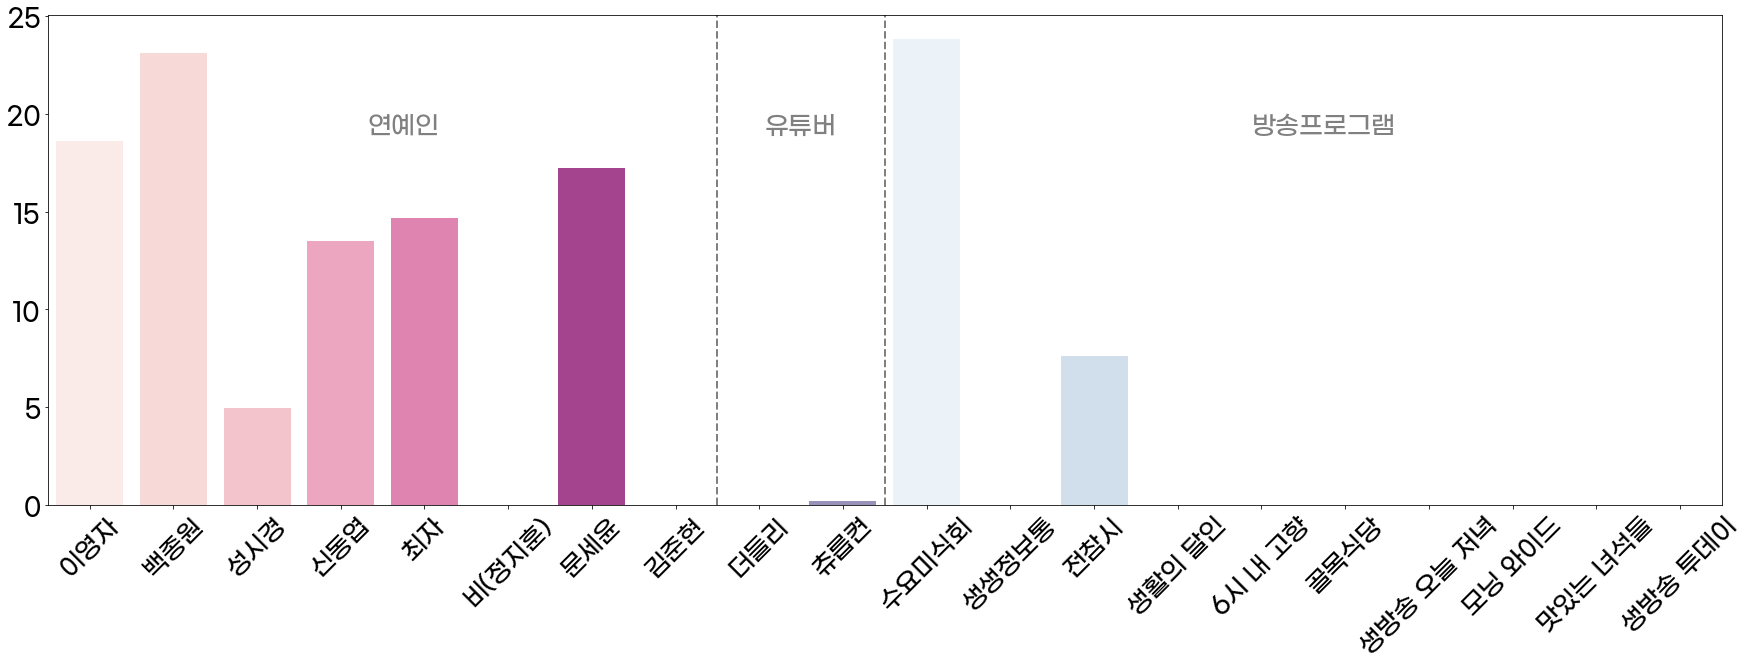

In [99]:
# seaborn
plt.rc('font', size=25)
plt.figure(figsize=(30,10))
sns.barplot(df_res_pos.resource, df_res_pos.positive_avg, palette=my_colors, alpha  = 0.8)
# 기준선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, df_res_pos["positive_avg"].max() * 0.80, "연예인",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, df_res_pos["positive_avg"].max() * 0.80, "유튜버",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, df_res_pos["positive_avg"].max() * 0.80, "방송프로그램",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.savefig('./output/senti/pos_avg_naver.png', transparent = True)
plt.show()